# IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import cv2 as cv
from skimage import feature

# IMPORT DATASETS

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Link dataset: https://drive.google.com/drive/folders/1c_APRJ26tW_F3Kqyuc1ZdkzCNZDDU25D?usp=sharing

# Preprocessing

In [ ]:
class_citra = ['Nazli', 'Ak']
citra_direct = "../content/drive/My Drive/Last Project/Grapevine_Dataset/"
size_citra = 256

data_citra, label_citra = [],[]

for label in class_citra:
  path = os.path.join(citra_direct, label)
  class_num = class_citra.index(label)  
  
  for img in os.listdir(path):
    gabung = os.path.join(path, img)
    print(gabung)
    try:
      #Membaca citra
      img_arr = cv.imread(gabung, 0)

      #Me-resize citra
      resized_arr = cv.resize(img_arr, (size_citra, size_citra))

      #Memotong citra  
      cropped_image = resized_arr[35:220, 60:230] #(Vertikal : horizontal)

      #Remove Noise
      median3_3 = cv.medianBlur(cropped_image, ksize = 3)

      #Mendeteksi tepi citra dengan median 3x3
      edges = cv.Canny(median3_3, 255, 180)

      data_citra.append(edges)
      label_citra.append(class_num)

    except Exception as e:
      print(e)

../content/drive/My Drive/Last Project/Grapevine_Dataset/Nazli/Nazli (9).png
../content/drive/My Drive/Last Project/Grapevine_Dataset/Nazli/Nazli (84).png
../content/drive/My Drive/Last Project/Grapevine_Dataset/Nazli/Nazli (8).png
../content/drive/My Drive/Last Project/Grapevine_Dataset/Nazli/Nazli (39).png
../content/drive/My Drive/Last Project/Grapevine_Dataset/Nazli/Nazli (44).png
../content/drive/My Drive/Last Project/Grapevine_Dataset/Nazli/Nazli (75).png
../content/drive/My Drive/Last Project/Grapevine_Dataset/Nazli/Nazli (61).png
../content/drive/My Drive/Last Project/Grapevine_Dataset/Nazli/Nazli (25).png
../content/drive/My Drive/Last Project/Grapevine_Dataset/Nazli/Nazli (52).png
../content/drive/My Drive/Last Project/Grapevine_Dataset/Nazli/Nazli (60).png
../content/drive/My Drive/Last Project/Grapevine_Dataset/Nazli/Nazli (70).png
../content/drive/My Drive/Last Project/Grapevine_Dataset/Nazli/Nazli (56).png
../content/drive/My Drive/Last Project/Grapevine_Dataset/Nazli/Naz

In [ ]:
img_arr

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
len(data_citra)

200

In [ ]:
#Normalisasi citra
citra_piksel = data_citra.copy()
citra_piksel = np.asarray(citra_piksel)
#citra_piksel = citra_piksel.astype('float')
#citra_piksel/=255.0

In [ ]:
citra_piksel

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

# HITUNG LBP FEATURES

In [ ]:
def lbpFeatures(citra, radius, sampling_of_pixel):

  #Mengecek citra apakah sudah mode grayscale atau belum
  if(len(citra.shape) > 2): 

    #Mengubah gambar ke mode grayscale
    citra = citra.astype(float)
    citra = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)

  citra = citra.astype(np.uint8)

  #Normalisasi pixel
  i_min = np.min(citra)
  i_max = np.max(citra)

  if(i_max - i_min > 0):
    citra = (citra - i_min)/(i_max - i_min)
  
  #Hitung fitur LBP
  lbp = feature.local_binary_pattern(citra, sampling_of_pixel, radius, method="uniform")

  #Membuat histogram, array 1D
  (hist, _) = np.histogram(lbp.ravel(), bins = np.arange(0, sampling_of_pixel + 3), range = (0, sampling_of_pixel + 2))

  #Normalisasi Histogram
  hist = hist.astype(float)
  hist /= (hist.sum() + 1e-6) #0.000001

  return hist

# MASUKKAN FEATURES LBP KEDALAM DATAFRAME

In [ ]:
fitur_citra = []
for citra in citra_piksel:
  #radius = 6
  #sampling = 2
  fitur = lbpFeatures(citra, 6, 2)
  fitur_citra.append(fitur)

In [ ]:
label_df = pd.DataFrame(label_citra, columns=['Label'])

In [ ]:
citra_df = pd.DataFrame(fitur_citra).assign(label = label_df)

In [ ]:
citra_df['label'].value_counts()

0    100
1    100
Name: label, dtype: int64

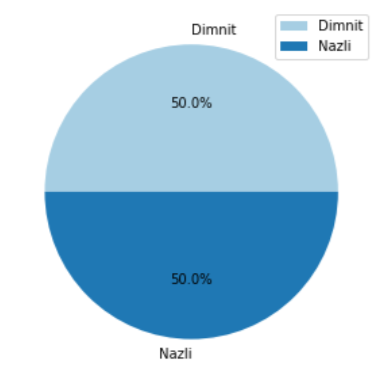

In [ ]:
citra_df

,0,1,2,3,label
0,0.026455,0.005787,0.967758,0.0,0
1,0.032432,0.007758,0.959809,0.0,0
2,0.022035,0.006614,0.971351,0.0,0
3,0.030843,0.011574,0.957583,0.0,0
4,0.031479,0.004642,0.963879,0.0,0
...,...,...,...,...,...
195,0.022321,0.006359,0.971320,0.0,1
196,0.025342,0.005596,0.969062,0.0,1
197,0.019459,0.004006,0.976534,0.0,1
198,0.028521,0.007186,0.964293,0.0,1


# VISUALISASI CITRA

In [ ]:
kelas0 = citra_piksel[1]
kelas1 = citra_piksel[101]

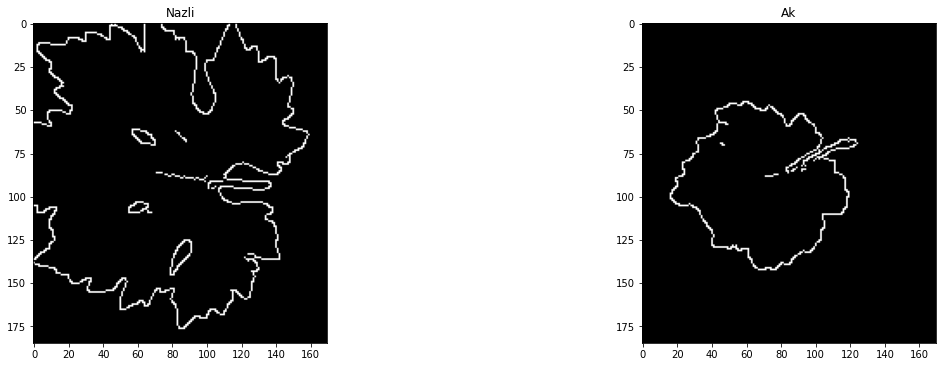

In [ ]:
citra_data = [kelas0, kelas1]
teks_data = ["Nazli","Ak"]

figure = plt.figure(figsize = (20, 20))
next = 1

for i in range(0, len(citra_data)):
    tampilan = figure.add_subplot(3, 2, next)
    tampilan.imshow(citra_data[i], cmap='gray')
    tampilan.title.set_text(teks_data[i])
    next += 1

plt.show()

In [ ]:
lbp0 = lbpFeatures(kelas0, 6, 2)
lbp1 = lbpFeatures(kelas1, 6, 2)

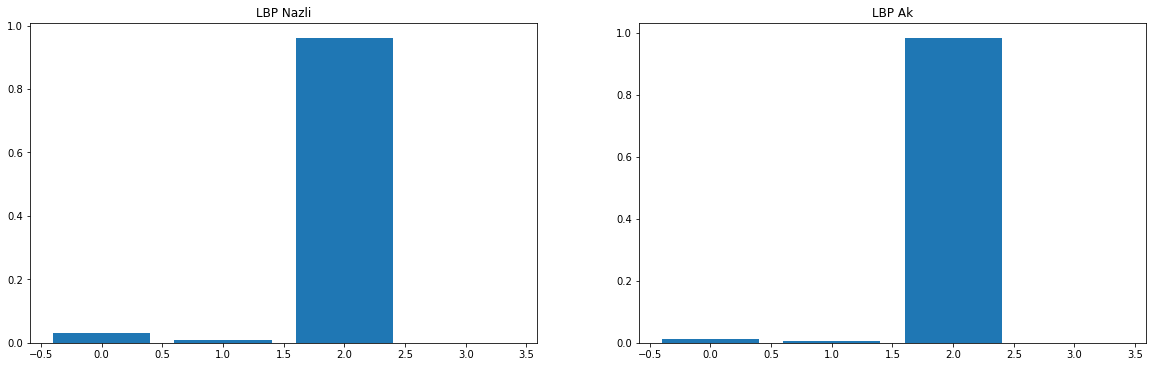

In [ ]:
lbp_data = [lbp0, lbp1]
height = range(len(lbp0))
teks_data = ["LBP Nazli", "LBP Ak"]

figure = plt.figure(figsize = (20, 20))
next = 1

for i in range(0, len(citra_data)):
    tampilan = figure.add_subplot(3, 2, next)
    tampilan.bar(height, lbp_data[i])
    tampilan.title.set_text(teks_data[i])
    next += 1

plt.show()


In [ ]:
citra_df.to_csv("datasetdaun.csv",index=False)

# SPLITTING DATA


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
citra_df = pd.read_csv("datasetdaun.csv")
X = citra_df.iloc[:,:-1].copy()
Y = citra_df[['label']].copy()

In [ ]:
citra_df

,0,1,2,3,label
0,0.026455,0.005787,0.967758,0.0,0
1,0.032432,0.007758,0.959809,0.0,0
2,0.022035,0.006614,0.971351,0.0,0
3,0.030843,0.011574,0.957583,0.0,0
4,0.031479,0.004642,0.963879,0.0,0
...,...,...,...,...,...
195,0.022321,0.006359,0.971320,0.0,1
196,0.025342,0.005596,0.969062,0.0,1
197,0.019459,0.004006,0.976534,0.0,1
198,0.028521,0.007186,0.964293,0.0,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 10)

# SVM

In [ ]:
modelSVM = SVC(kernel = 'linear', C = 1000, gamma = 1, decision_function_shape = 'ovr', class_weight = 'balanced')

modelSVM.fit(X_train, y_train.values.ravel())

y_pred_svm = modelSVM.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f'Accuracy Score : {accuracy_score(y_test, y_pred_svm)}')

print('Precission Score : ', precision_score(y_test, y_pred_svm, average='micro'))

print('Recall Score : ', precision_score(y_test, y_pred_svm, average='micro'))

print('F1 Score : ', precision_score(y_test, y_pred_svm, average='micro'))

Accuracy Score : 0.875
Precission Score :  0.875
Recall Score :  0.875
F1 Score :  0.875


In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.86      0.90      0.88        20

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.88      0.88      0.87        40



Text(69.0, 0.5, 'Class Asli')

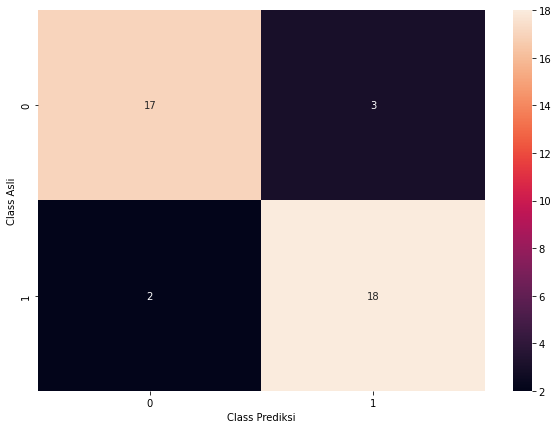

In [ ]:
import seaborn as sns
import tensorflow as tf

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_svm)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Class Prediksi')
plt.ylabel('Class Asli')